# Muhamad Rizki Nurfiqri (1301204009)
# Kiki Dwi Prasetyo (1301204027)

Preparation Data

In [1]:
#Import Library
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import random as rndm
import matplotlib.pyplot as plt
import math
import warnings
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



In [2]:
!gdown --id 1G5O8MfugMJmUADs1wkhaRsFuvEClzN-T
!gdown --id 1YLnjrqsjIuxXQOJS76f9o8sLilqqryq5

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1G5O8MfugMJmUADs1wkhaRsFuvEClzN-T
To: /content/test.csv
100% 23.3k/23.3k [00:00<00:00, 98.7MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1YLnjrqsjIuxXQOJS76f9o8sLilqqryq5
To: /content/train.csv
100% 102k/102k [00:00<00:00, 127MB/s]


Import Dataset

In [3]:
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


Informasi Dataset Train dan Test

In [4]:
# Load Data train
df_train = pd.read_csv("train.csv", na_values = '?')
df_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Load Data test
df_test = pd.read_csv("test.csv")
df_test.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,911320501,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.017770,0.1516,...,12.77,24.02,82.68,495.1,0.1342,0.1808,0.18600,0.08288,0.3210,0.07863
1,911320502,13.170,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.028700,0.1454,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
2,9113239,13.240,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.028330,0.1601,...,15.44,25.50,115.00,733.5,0.1201,0.5646,0.65560,0.13570,0.2845,0.12490
3,9113455,13.140,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.035100,0.1562,...,14.80,25.46,100.90,689.1,0.1351,0.3549,0.45040,0.11810,0.2563,0.08174
4,9113514,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,...,11.15,24.62,71.11,380.2,0.1388,0.1255,0.06409,0.02500,0.3057,0.07875


In [6]:
# Menampilkan Baris dan Kolom Kedua data
print("Train : ", df_train.shape, "\n", "Test : ",df_test.shape)

Train :  (463, 32) 
 Test :  (106, 31)


In [7]:
df_train.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
458    False
459    False
460    False
461    False
462    False
Length: 463, dtype: bool

In [8]:
df_test.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
101    False
102    False
103    False
104    False
105    False
Length: 106, dtype: bool

In [9]:
# Menampilkan ringkasan singkat dari data test 
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       106 non-null    int64  
 1   radius_mean              106 non-null    float64
 2   texture_mean             106 non-null    float64
 3   perimeter_mean           106 non-null    float64
 4   area_mean                106 non-null    float64
 5   smoothness_mean          106 non-null    float64
 6   compactness_mean         106 non-null    float64
 7   concavity_mean           106 non-null    float64
 8   concave points_mean      106 non-null    float64
 9   symmetry_mean            106 non-null    float64
 10  fractal_dimension_mean   106 non-null    float64
 11  radius_se                106 non-null    float64
 12  texture_se               106 non-null    float64
 13  perimeter_se             106 non-null    float64
 14  area_se                  1

In [10]:
# Menampilkan ringkasan singkat dari data train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       463 non-null    int64  
 1   diagnosis                463 non-null    object 
 2   radius_mean              463 non-null    float64
 3   texture_mean             463 non-null    float64
 4   perimeter_mean           463 non-null    float64
 5   area_mean                463 non-null    float64
 6   smoothness_mean          463 non-null    float64
 7   compactness_mean         463 non-null    float64
 8   concavity_mean           456 non-null    float64
 9   concave points_mean      456 non-null    float64
 10  symmetry_mean            463 non-null    float64
 11  fractal_dimension_mean   463 non-null    float64
 12  radius_se                463 non-null    float64
 13  texture_se               463 non-null    float64
 14  perimeter_se             4

Pre-Procesing

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

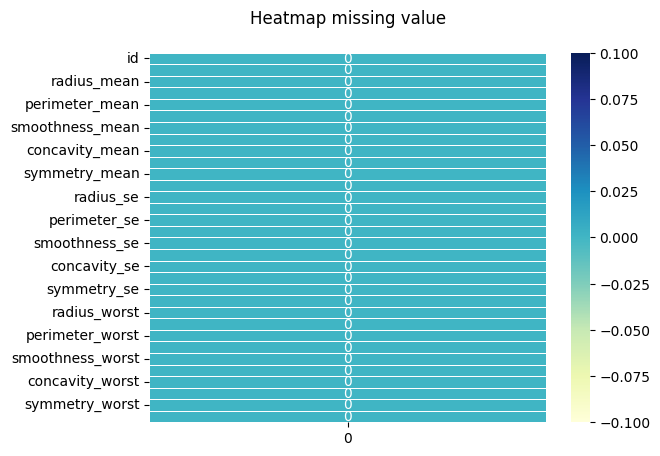

In [11]:
# Menampilkan Missing Value berupa  "?"
missing_count_train = df_train.eq("?").sum().to_frame()
missing_count_test = df_test.eq("0").sum().to_frame()
# Tampilkan heatmap
sns.heatmap(missing_count_train, linewidth=.5, cbar = True, annot = True,cmap = "YlGnBu")
plt.title("Heatmap missing value\n")
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

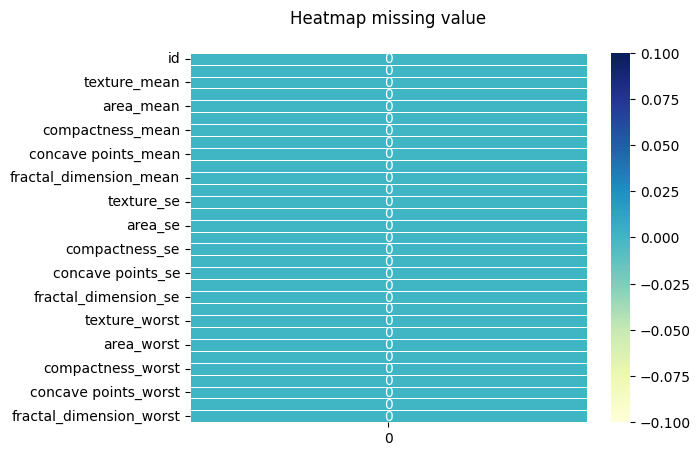

In [12]:
sns.heatmap(missing_count_test, linewidth=.5, cbar = True, annot = True,cmap = "YlGnBu")
plt.title("Heatmap missing value\n")
plt

In [13]:
#Ganti missing value dengan nilai mean
df_train = df_train.fillna(df_train.mean())
df_test = df_test.fillna(df_test.mean())
     

<ipython-input-13-e04d38d2c11e>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train = df_train.fillna(df_train.mean())


In [14]:
missing_values_train = df_train.isnull().sum()
missing_values_test = df_test.isnull().sum()
print("Jumlah missing value di train.csv: \n", missing_values_train)
print("Jumlah missing value di test.csv: \n", missing_values_test)
     

Jumlah missing value di train.csv: 
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Jumlah missing value d

In [15]:
#Hasil preprocessing
df_train.to_csv('df_train_preprocessed.csv', index=False)
df_test.to_csv('df_test_preprocessed.csv', index=False)


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       463 non-null    int64  
 1   diagnosis                463 non-null    object 
 2   radius_mean              463 non-null    float64
 3   texture_mean             463 non-null    float64
 4   perimeter_mean           463 non-null    float64
 5   area_mean                463 non-null    float64
 6   smoothness_mean          463 non-null    float64
 7   compactness_mean         463 non-null    float64
 8   concavity_mean           463 non-null    float64
 9   concave points_mean      463 non-null    float64
 10  symmetry_mean            463 non-null    float64
 11  fractal_dimension_mean   463 non-null    float64
 12  radius_se                463 non-null    float64
 13  texture_se               463 non-null    float64
 14  perimeter_se             4

Spliting feature Data

In [17]:
#mencoba mendiagnosis tumor pada indikasi kanker
print(df_test.columns)
print("kolom : ", len(df_test.columns))

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
kolom :  31


In [18]:
print(df_train.columns)
print("kolom : ", len(df_train.columns))

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
kolom :  32


dapat dilihat dari dataset diatas, bahwa tidak ada yang memilki label "diagnosis", lalu dataset train akan di split untuk training dan tesing, tetapi untuk dataset test akan dijadikan acuan hasil diagnosis 

dan untuk komol "diagnosis akan dijadikan label, tetapi tipe data nya di convert menjadi integer "0" merepresentasikan "M" yang menandakan bahwa bukan kanker. lalu untuk "1" merepresentasikan "B" bahwa kanker 

In [19]:
df_train['diagnosis'] = df_train['diagnosis'].replace({'M': 0, 'B': 1})

In [20]:
df_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
df_train.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
458,9112594,1,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,...,14.34,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291
459,9112712,1,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,...,10.67,36.92,68.03,349.9,0.1110,0.1109,0.07190,0.04866,0.2321,0.07211
460,911296201,0,17.080,27.15,111.20,930.9,0.09898,0.11100,0.10070,0.06431,...,22.96,34.49,152.10,1648.0,0.1600,0.2444,0.26390,0.15550,0.3010,0.09060
461,911296202,0,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,...,36.04,31.37,251.20,4254.0,0.1357,0.4256,0.68330,0.26250,0.2641,0.07427
462,9113156,1,14.400,26.99,92.25,646.1,0.06995,0.05223,0.03476,0.01737,...,15.40,31.98,100.40,734.6,0.1017,0.1460,0.14720,0.05563,0.2345,0.06464


In [22]:
df_test.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,911320501,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.017770,0.1516,...,12.77,24.02,82.68,495.1,0.1342,0.1808,0.18600,0.08288,0.3210,0.07863
1,911320502,13.170,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.028700,0.1454,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
2,9113239,13.240,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.028330,0.1601,...,15.44,25.50,115.00,733.5,0.1201,0.5646,0.65560,0.13570,0.2845,0.12490
3,9113455,13.140,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.035100,0.1562,...,14.80,25.46,100.90,689.1,0.1351,0.3549,0.45040,0.11810,0.2563,0.08174
4,9113514,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,...,11.15,24.62,71.11,380.2,0.1388,0.1255,0.06409,0.02500,0.3057,0.07875


In [23]:
df_test.tail()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
101,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
102,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
103,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
104,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
105,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [24]:
#mendefinisikan fitur-fitur dan label 
features = df_train[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
label = df_train[['diagnosis']]




In [25]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.2)

**PEMODELAN TPOT**

In [26]:
#menginstall tpot 
!pip install tpot
import tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=a184aa83f889b4061f674ec9b0c364e6c48f18149fd409244ec6bedeb0112b77
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [27]:
from tpot.tpot import TPOTClassifier

tpot =  TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

FIT DATA 

In [28]:
#Fit data
tpot.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9702702702702704

Generation 2 - Current best internal CV score: 0.9702702702702704

Generation 3 - Current best internal CV score: 0.9702702702702704

Generation 4 - Current best internal CV score: 0.9702702702702704

Generation 5 - Current best internal CV score: 0.9702702702702704

Best pipeline: XGBClassifier(PolynomialFeatures(MinMaxScaler(input_matrix), degree=2, include_bias=False, interaction_only=False), learning_rate=0.001, max_depth=3, min_child_weight=1, n_estimators=100, n_jobs=1, subsample=0.5, verbosity=0)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

Accuracy on test set: 97.849%
F1-Score on test set: 0.983
-------------------- confusion matrix --------------------


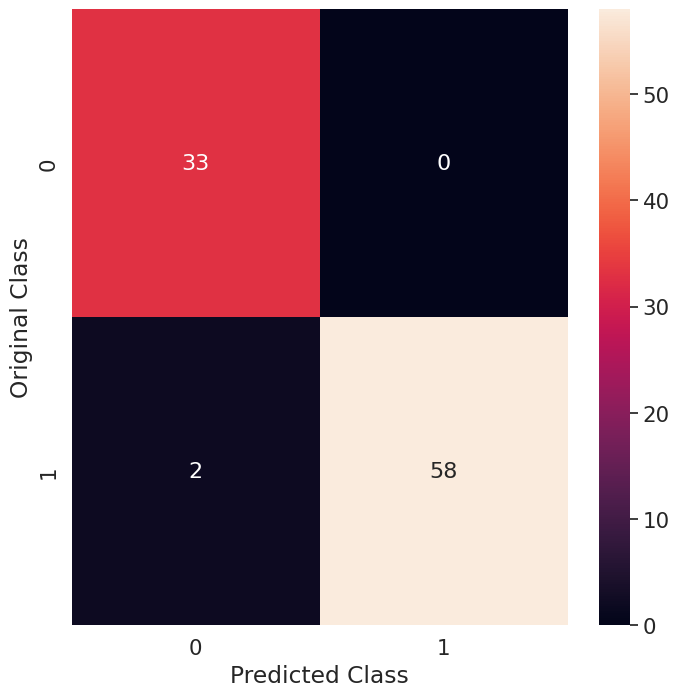

In [29]:
#EVALUASI 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_pred=tpot.predict(x_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))
print("-"*20, "confusion matrix", "-"*20)
plt.figure(figsize=(8,8))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()


In [30]:
tpot.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.978494623655914

klasifikasi prediksi kolom Diagnosa Kanker dari dataset train

In [31]:
df_test = df_test.drop('id', axis=1)
     

In [32]:
predictions = tpot.predict(df_test)

In [33]:
df_test['Diagnosis_Prediction'] = predictions
predictions_str = {1 : 'M', 0 : 'B'}
df_test['Diagnosis_Prediction'] = df_test['Diagnosis_Prediction'].map(predictions_str)
df_test     

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis_Prediction
0,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.017770,0.1516,0.05859,...,24.02,82.68,495.1,0.13420,0.18080,0.18600,0.08288,0.3210,0.07863,M
1,13.170,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.028700,0.1454,0.05549,...,23.89,95.10,687.6,0.12820,0.19650,0.18760,0.10450,0.2235,0.06925,M
2,13.240,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.028330,0.1601,0.06432,...,25.50,115.00,733.5,0.12010,0.56460,0.65560,0.13570,0.2845,0.12490,M
3,13.140,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.035100,0.1562,0.06020,...,25.46,100.90,689.1,0.13510,0.35490,0.45040,0.11810,0.2563,0.08174,M
4,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,0.06412,...,24.62,71.11,380.2,0.13880,0.12550,0.06409,0.02500,0.3057,0.07875,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,B
102,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,B
103,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,B
104,20.600,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.152000,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400,B


EKSPERIMEN 

In [34]:
tpot =  TPOTClassifier(generations=7, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [35]:
#Fit data
tpot.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/160 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9702702702702704

Generation 2 - Current best internal CV score: 0.9702702702702704

Generation 3 - Current best internal CV score: 0.9702702702702704

Generation 4 - Current best internal CV score: 0.9702702702702704

Generation 5 - Current best internal CV score: 0.9702702702702704

Generation 6 - Current best internal CV score: 0.9702702702702704

Generation 7 - Current best internal CV score: 0.9702702702702704

Best pipeline: XGBClassifier(PolynomialFeatures(MinMaxScaler(input_matrix), degree=2, include_bias=False, interaction_only=False), learning_rate=0.001, max_depth=3, min_child_weight=1, n_estimators=100, n_jobs=1, subsample=0.5, verbosity=0)


TPOTClassifier(generations=7, population_size=20, random_state=42, verbosity=2)